<a href="https://colab.research.google.com/github/RonaldManoelScientist/Diferenca_de_salario_homens_mulheres/blob/main/Diferen%C3%A7a_de_Sal%C3%A1rio_Homens_e_Mulheres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diferença Salárial entre Homems e mulheres

Documentos para quem quer se aprofundar no assunto e entender a raiz do problema: [The Gender Wage Gap](https://docs.iza.org/dp9656.pdf)

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CPS = pd.read_csv('/content/drive/MyDrive/DataSet/Salário entre Homens e Mulheres/CurrentPopulationSurvey.csv') # População atual
IDC = pd.read_csv('/content/drive/MyDrive/DataSet/Salário entre Homens e Mulheres/PanelStudyIncomeDynamics.csv')# 

pd.set_option('display.max_columns', None)
CPS.head()

,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,farm,month,pernum,wtsupp,relate,age,sex,race,marst,popstat,bpl,yrimmig,citizen,mbpl,fbpl,nativity,hispan,sch,educ99,schlcoll,empstat,labforce,occ,occ1990,ind1990,occ1950,ind,ind1950,classwkr,occly,occ50ly,indly,ind50ly,classwly,wkswork1,wkswork2,hrswork,uhrswork,union,incwage,incbus,incfarm,inclongj,oincwage,srcearn,ftype,quhrswor,qwkswork,qincbus,qincfarm,qinclong,qincwage,qsrcearn,o_numprec,o_hwtsupp,o_gq,o_region,o_statefip,o_metro,o_metarea,o_county,o_farm,o_month,o_pernum,o_wtsupp,o_relate,o_age,o_sex,o_race,o_marst,o_popstat,o_bpl,o_yrimmig,o_citizen,o_mbpl,o_fbpl,o_nativity,o_hispan,o_educ,o_educ99,o_schlcoll,o_empstat,o_labforce,o_occ,o_occ1990,o_ind1990,o_occ1950,o_ind,o_ind1950,o_classwkr,o_occly,o_occ50ly,o_indly,o_ind50ly,o_classwly,o_wkswork1,o_wkswork2,o_hrswork,o_uhrswork,o_union,o_incwage,o_incbus,o_incfarm,o_inclongj,o_oincwage,o_srcearn,o_ftype,o_quhrswor,o_qwkswork,o_qincbus,o_qincfarm,o_qincwage,origrace,white,black,hisp,othrace,educorig,ba,adv,groupquar,potexp,potexp2,selfemp,military,employed,annhrs,ft,niincwage,incwageman,tcoincwage,tcinclongj,tcincwage,hrwage,perconexp,expendbase10,inflate,realhrwage,uncenrealhrwage,lnrwg,hdwfcoh,notalloc,basesamp,wagesamp,occ_orig,adj_occ,occ_2010_orig,ind_orig,adj_ind,ind_2002_orig,ind_2007_orig,occ_81,ind_81,occ_2000female,unmatched_fem_81,occ_2000male,unmatched_male_81,ind_2000,occ2000_81,ind2000_81,occ_1990,ind_1990,occ_1999,ind_1999,unmatched_occ_90,occ2000_90,unmatched_ind_90,ind2000_90,indname2000_90,unmatched_occ_99,occ2000_99,unmatched_ind_99,ind2000_99,indname2000_99,un_lnrealwg,northeast,northcentral,south,west,female,adj_ind2,adj_occ2,adj_occ2name,Agriculture,miningconstruction,durables,nondurables,Transport,Utilities,Communications,retailtrade,wholesaletrade,finance,SocArtOther,hotelsrestaurants,Medical,Education,professional,publicadmin,sumadj_ind,manager,business,financialop,computer,architect,scientist,socialworker,postseceduc,legaleduc,artist,lawyerphysician,healthcare,healthsupport,protective,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,1.0,3,1,1052.650024,101,58,1,3,6,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,NaN,NaN,10,2,335,335,871.0,390,871,896,28,335,390,871,896.0,28,52,6,35.0,35,0.0,14200.0,0,0,14200.0,0.0,1.0,2,0.0,0.0,0,0,0.0,0,0.0,1,1052.650024,1,12,36,2,5607,NaN,1.0,3,1,1052.650024,101,58,1,100,6,1,NaN,NaN,NaN,NaN,NaN,NaN,200,72,NaN,0.0,10,2,335,335,871,390,871,896,28,335,390,871,896,28,52,6,35,35,0.0,14200.0,0,0,14200.0,0.0,1.0,2,0.0,0.0,0,0,0,100,0,0,1,0,72,0,0,0,40,1600,0,0,1,1820,1,14200.0,14200.0,0.0,14200.0,14200.0,7.802198,64.639999,101.653999,1.572618,12.269874,12.269874,2.507147,1,1,1,1,335,526.0,NaN,871,837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.0,871.0,NaN,NaN,NaN,526.0,NaN,837.0,Individual and family services,NaN,NaN,NaN,NaN,NaN,2.507147,1,0,0,0,0,62,42,Office and Admin Support,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,NaN,3,4,1288.880005,1260,28,1,1,6,1,9900.0,NaN,NaN,9900.0,9900.0,1.0,0.0,12.0,10.0,NaN,10,2,5120,337,762.0,310,8660,836,21,5120,310,8660,836.0,22,52,6,40.0,40,1.0,17680.0,0,0,17680.0,0.0,1.0,5,0.0,0.0,0,0,0.0,0,0.0,4,971.200012,1,33,5,2,9999,0.0,NaN,3,4,1288.880005,1260,28,1,100,6,1,9900.0,0.0,0.0,9900.0,9900.0,1.0,0,73,10.0,0.0,10,2,5120,337,762,310,8660,836,21,5120,310,8660,836,22,52,6,40,40,1.0,17680.0,0,0,17680.0,0.0,1.0,5,0.0,0.0,0,0,0,100,1,0,0,0,73,0,0,0,10,100,0,0,1,2080,1,17680.0,17680.0,0.0,17680.0,17680.0,8.500000,100.063004,101.653999,1.015900,8.635149,8.635149,2.155841,0,1,1,1,5120,512.0,NaN,8660,866,NaN,8660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.155841,0,0,1,0,0,68,42,Office and Admin Support,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,1990,8425,

## Dicionario de Variáveis
A maioria delas não foi utilizada na análise salárial, no entanto é possivel buscar bastante informação através


* `intnum68`: 1968 INTERVIEW NUMBER
* `pernum68`: PERSON NUMBER 68
* `wave`: Current Wave of the PSID
* `sex`: gender SEX OF INDIVIDUAL (1=male, 2=female)
* `intnum`: Wave-specific Interview Number
* `farminc`: Farm Income
* `region`: regLab Region of Current Interview
* `famwgt`: this is the PSID’s family weight, which is used in all analyses
* `relhead`: ER34103L this is the relation to the head of household (10=head; 20=legally married wife; 22=cohabiting partner)
* `age`: Age
* `employed`: ER34116L Whether or not employed or on temp leave (everyone gets a 1 for this variable, since our wage analyses use only the currently employed)
* `sch`: schLbl Highest Year of Schooling
* `annhrs`: Annual Hours Worked
* `annlabinc`: Annual Labor Income
* `occ`: 3 Digit Occupation 2000 codes
* `ind`: 3 Digit Industry 2000 codes
* `white`: White, nonhispanic dummy variable
* `black`: Black, nonhispanic dummy variable
* `hisp`: Hispanic dummy variable
* `othrace`: Other Race dummy variable
* `degree`: degreeLbl Agent's Degree Status (0=no college degree; 1=bachelor’s  without advanced degree; 2=advanced degree)
* `degupd`: degreeLbl Agent's Degree Status (Updated with 2009 values)
* `schupd`: schLbl Schooling (updated years of schooling)
* `annwks`: Annual Weeks Worked
* `unjob`: unJobLbl Union Coverage dummy variable
* `usualhrwk`: Usual Hrs Worked Per Week
* `labincbus`: Labor Income from Business
* `yrsexp`: Experience

In [128]:
CPS.columns

Index(['year', 'serial', 'numprec', 'hwtsupp', 'gq', 'region', 'statefip',
       'metro', 'metarea', 'county',
       ...
       'foodcare', 'building', 'sales', 'officeadmin', 'farmer',
       'constructextractinstall', 'production', 'transport', 'sumadj_occ',
       'LEHS'],
      dtype='object', length=234)

In [129]:
print(f'O Número de Entradas é de: {CPS.shape[0]}')
print(f'O Número de Variáveis é de: {CPS.shape[1]}')

O Número de Entradas é de: 344287
O Número de Variáveis é de: 234


In [130]:
IDC.head()

,intnum68,pernum68,wave,sex,intnum,farminc,region,famwgt,relhead,age,employed,sch,annhrs,annlabinc,occ,ind,white,black,hisp,othrace,degree,degupd,schupd,annwks,unjob,usualhrwk,labincbus,yrsexp,yrsftexp,yrsptexp,yrsptexpsq,yrsftexpsq,yrsExpSq,yrsexpfz,yrsftexpfz,yrsptexpfz,yrsexpfzsq,yrsftexpfzsq,yrsptexpfzsq,wtrgov,selfemp,predict98,predictft98,predict00,predictft00,predict02,predictft02,predict04,predictft04,predict06,predictft06,predict08,predictft08,predict10,predictft10,origage,origannHrsHD,origannHrsWF,origannLabIncHD,origannLabIncWF,origannWeeksHD,origannWeeksWF,origcurrHrWkHD,origcurrHrWkWF,origdegreeHD,origdegreeWF,origemp,origeverwrkHD07,origeverwrkHD09,origeverwrkHD11,origeverwrkHD99,origeverwrkWF07,origeverwrkWF09,origeverwrkWF11,origeverwrkWF99,origfamWgt,origfarmInc,origindHD,origindWF,origmarSt,orignumChld,origoccHD,origoccWF,origraceHD,origraceWF,origregion,origrelHead,origsch,origschfamHD07,origschfamHD09,origschfamHD11,origschfamHD81,origschfamHD99,origschfamWF07,origschfamWF09,origschfamWF11,origschfamWF81,origschfamWF99,origsexHead,origspanHD,origspanWF,origstopwrkHDE299,origstopwrkHDE399,origstopwrkHDE499,origstopwrkHDE599,origstopwrkHDE699,origstopwrkHDU299,origstopwrkHDU399,origstopwrkHDU499,origstopwrkHDU599,origstopwrkHDU699,origstopwrkWFE299,origstopwrkWFE399,origstopwrkWFE499,origstopwrkWFE599,origstopwrkWFE699,origstopwrkWFU299,origstopwrkWFU399,origstopwrkWFU499,origstopwrkWFU599,origstopwrkWFU699,origtotYrsFTHD,origtotYrsFTWF,origtotYrsHD,origtotYrsWF,origunJobHD,origunJobWF,origwrkPriorJanHD,origwrkPriorJanWF,origwtrNewHD,origwtrNewWF,origyrNewHD,origyrNewWF,predict97,predictft97,predictfz97,predictftfz97,predictfz98,predictftfz98,predict1999,predictft1999,predictfz99,predictftfz99,predictfz00,predictftfz00,predict01,predictft01,predictfz01,predictftfz01,predictfz02,predictftfz02,predict03,predictft03,predictfz03,predictftfz03,predictfz04,predictftfz04,predictfz06,predictftfz06,predict2007,predictft2007,predictfz07,predictftfz07,predictfz08,predictftfz08,predict2009,predictft2009,predictfz09,predictftfz09,predictfz10,predictftfz10,predict2011,predictft2011,predictfz11,predictftfz11,origAdvHD,origAdvWF,origBAHD,origBAWF,origannWeeksHDE,origannWeeksHDR,origannWeeksHDU,origannWeeksWFE,origannWeeksWFR,origannWeeksWFU,origindHDE,origindWFE,origindHDU,origindWFU,origindHDR,origindWFR,origoccHDE,origoccHDR,origoccHDU,origoccWFE,origoccWFR,origoccWFU,origrace,origschHD,origschWF,origyrHghstDegHD,origyrHghstDegWF,origwtrCollDegHD,origwtrCollDegWF,origwtrCollHD,origwtrCollWF,predict,predictft,smsa,perconexp,hrwage,annhrs2,expendbase10,inflate,realhrwage,immigrantsamp,northeast,northcentral,south,west,lnrealwg,ft,potexp,potexp2,ba,adv,military,basesamp,wagesamp,female,ind2,occ2,occ2name,Agriculture,miningconstruction,durables,nondurables,Transport,Utilities,Communications,retailtrade,wholesaletrade,finance,SocArtOther,hotelsrestaurants,Medical,Education,professional,publicadmin,sumind,manager,business,financialop,computer,architect,scientist,socialworker,postseceduc,legaleduc,artist,lawyerphysician,healthcare,healthsupport,protective,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumocc,LEHS
0,1152,24,1981,1,3505,0.0,1.0,17.000,10,34,1,16.0,1600,10000.0,492,707,1,0,0,0,1.0,1.0,17,32.000000,0,50.0,0,12.0,12.0,0.0,0.0,144.0,144.0,12.0,12.0,0.0,144.0,144.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,1600,1224,10000.0,9600.0,NaN,NaN,50,24,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.000,0.0,NaN,NaN,1,3,NaN,NaN,NaN,NaN,1,1,16,17.0,17.0,17.0,16.0,17.0,12.0,16.0,16.0,12.0,12.0,1,NaN,NaN,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,7,4,5,5,NaN,NaN,5,5,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,0.0,1.0,0.0,32.0,0.0,0.0,51.0,0.0,0.0,718.0,838.0,0.0,0.0,0.0,0.0,270.0,0.0,0.0,75.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,43.977001,6.250000,1600.0,101.653999,2.311526,14.447040,0,1,0

In [131]:
IDC.columns

Index(['intnum68', 'pernum68', 'wave', 'sex', 'intnum', 'farminc', 'region',
       'famwgt', 'relhead', 'age',
       ...
       'foodcare', 'building', 'sales', 'officeadmin', 'farmer',
       'constructextractinstall', 'production', 'transport', 'sumocc', 'LEHS'],
      dtype='object', length=274)

In [132]:
print(f'O Número de Entradas é de: {IDC.shape[0]}')
print(f'O Número de Variáveis é de: {IDC.shape[1]}')

O Número de Entradas é de: 33398
O Número de Variáveis é de: 274


## 1 - Qual é a proporção de salario de mulher para homens?

* `o_incwage`: Original Wage and salary income'
* `o_oincwage`: Original Earnings from other work included wage and salary earnings'
* `o_srcearn`: Original Source of earnings from longest job'
* `incwage`: incwage_lbl Wage and salary income
* `oincwage`: oincwage_lbl Earnings from other work included wage and salary earnings
* `classwkr`: classwkr_lbl Class of worker (Self-empl=10, Wage/salary, private sector=21, Wage/salary, government=24, Federal govt employee=25, State govt employee=27, Local govt employee=28, Unpaid family worker=29)
* `classwly`: classwly_lbl Class of worker last year (Self-employed=14, Wage/salary private=22, Federal govt=25, State gov=27, Local gov=28, Unpaid family worker=29)
* `incwage`: incwage_lbl Wage and salary income
* `oincwage`: oincwage_lbl Earnings from other work included wage and salary earnings
* `srcearn:`: srcearn_lbl Source of earnings from longest (1=wage and salary; 4=without pay) job



## Original Wage and Salary Income

This Wage most important, but this is big part of salary

Vamos verificar a distribuição de homens e mulheres no dataset

In [133]:
CPS['sex'].value_counts()

1    175911
2    168376
Name: sex, dtype: int64

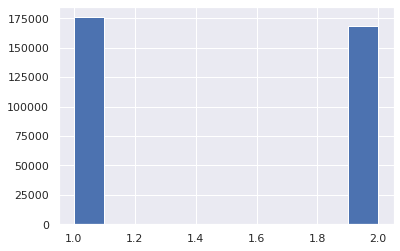

In [134]:
CPS['sex'].hist();

> 1 = Mulheres

> 2 = Homens

Podemos observar que a distribuição conta com uma diferença de 7,535. De mulheres a mais do que Homens 

Abaixo observamos a média salárial

In [135]:
CPS['o_incwage'].mean()

39761.695274581965

Abaixo observamos o quartile de 50%

In [136]:
CPS['o_incwage'].quantile(q=0.5)

30000.0

Verificaremos também o valor máximo

In [137]:
CPS['o_incwage'].max()

1259999.0

Fazendo as devidas alterações é Possivel excluir alguns outliers da nossa análise deixando assim os dados mais balanceados

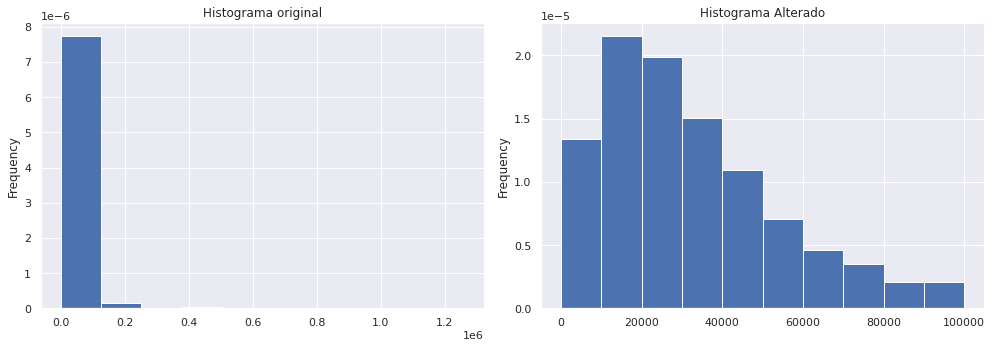

In [138]:
CPS_2 = CPS.query('o_incwage <= 100000')
fig, (ax,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14,5))

CPS_2["o_incwage"].plot(kind="hist", ax=ax2, density=True)
ax2.set_title('Histograma Alterado')
CPS["o_incwage"].plot(kind="hist", ax=ax, density=True)
ax.set_title('Histograma original')

sns.set_style("whitegrid")

plt.tight_layout()

In [139]:
CPS['o_incwage'].describe() #  Original Wage and salary income

count    3.442870e+05
mean     3.976170e+04
std      4.529758e+04
min      1.500000e+01
25%      1.670000e+04
50%      3.000000e+04
75%      5.000000e+04
max      1.259999e+06
Name: o_incwage, dtype: float64

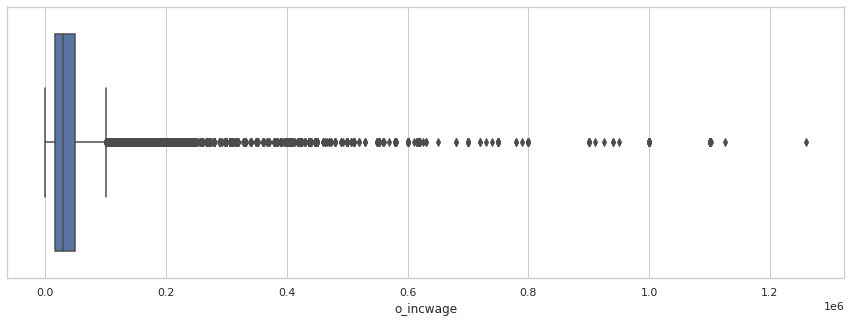

In [140]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=CPS["o_incwage"])

In [141]:
CPS_2['o_incwage'].describe()

count    328559.000000
mean      33210.939941
std       22380.114632
min          15.000000
25%       16000.000000
50%       28500.000000
75%       45000.000000
max      100000.000000
Name: o_incwage, dtype: float64

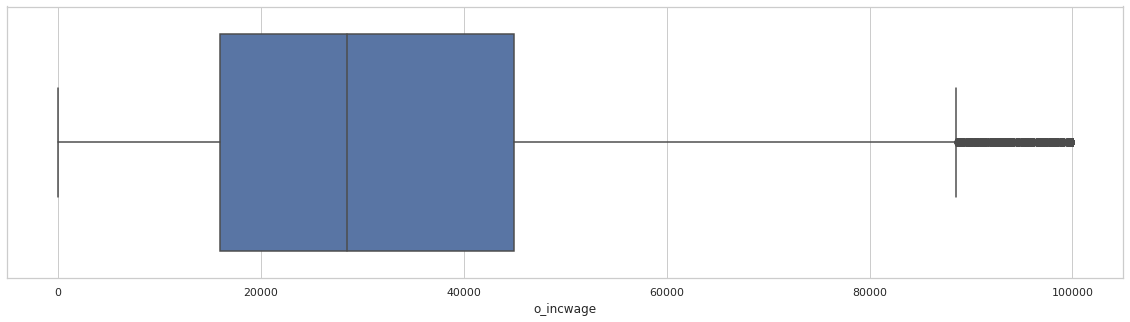

In [142]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=CPS_2["o_incwage"])

Com isso conseguimos observar a mudança na distribuição

> Com a alteração

In [143]:
CPS.groupby(['sex']).o_incwage.mean().sort_values(ascending=False) # Sem a Limpeza da média

sex
1    47729.860941
2    31436.945960
Name: o_incwage, dtype: float64

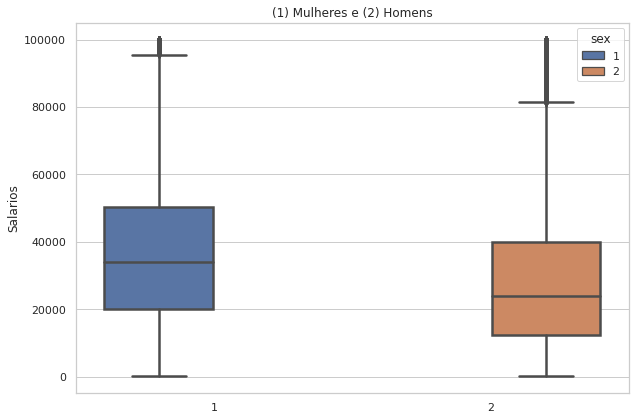

In [144]:
fig, ax = plt.subplots(figsize=(9,6)) #1 female, 2 male

                 
ax = sns.boxplot(x="sex", y="o_incwage",linewidth=2.5,
                 hue="sex", data=CPS_2)
ax.set_title("(1) Mulheres e (2) Homens")
ax.set_ylabel("Salarios")
ax.set_xlabel("")

plt.tight_layout()

## Outras fontes de renda


In [145]:
CPS_2['o_oincwage'].isnull().sum() # o_oincwage: # Original Earnings from other work included wage and salary earnings'

42379

In [146]:
CPS_2['o_oincwage'].shape

(328559,)

In [147]:
CPS_2['o_oincwage'] = CPS_2['o_oincwage'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
CPS_2['o_oincwage'].isnull().sum()

0

In [149]:
CPS_2['o_oincwage'].describe()

count    328559.000000
mean        736.392188
std        3560.103989
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       82098.000000
Name: o_oincwage, dtype: float64

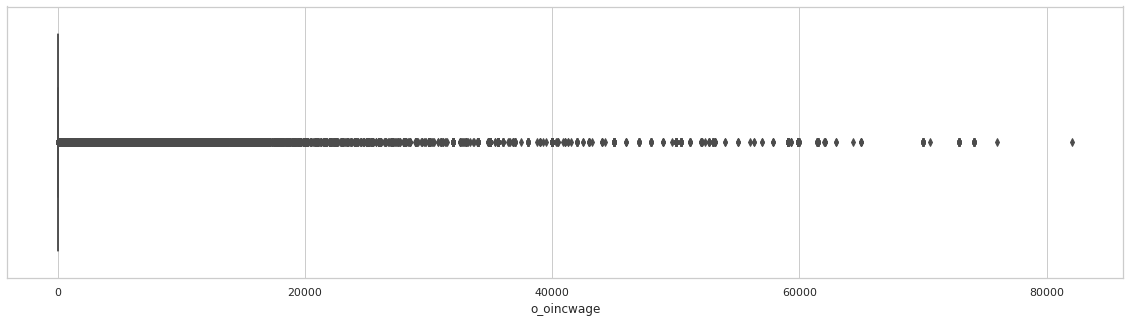

In [150]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=CPS_2["o_oincwage"])

In [151]:
CPS_2_ =  CPS_2.query('o_oincwage < 2000')

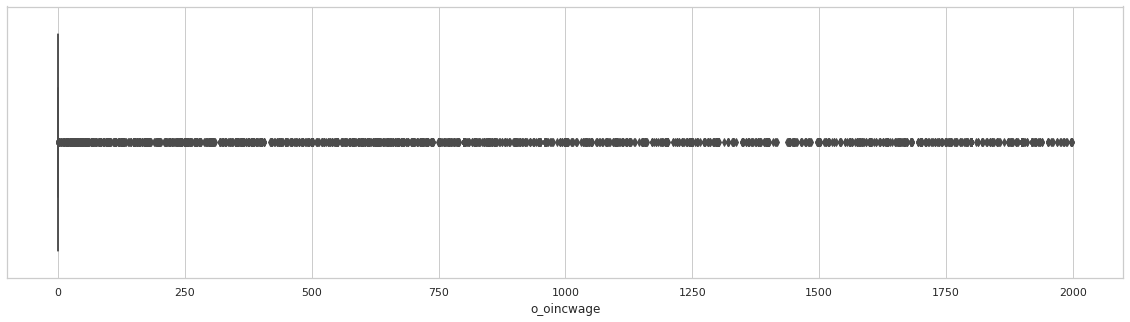

In [152]:

fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x= CPS_2_['o_oincwage'])

In [153]:
CPS_2['o_srcearn'] # Original Source of earnings from longest job' 

0         1.0
1         1.0
2         1.0
3         1.0
4         NaN
         ... 
344282    NaN
344283    1.0
344284    NaN
344285    1.0
344286    1.0
Name: o_srcearn, Length: 328559, dtype: float64

In [154]:
CPS_2['o_srcearn'].value_counts()

1.0    286133
4.0        47
Name: o_srcearn, dtype: int64

In [155]:
CPS_2['o_srcearn'].isnull().sum()

42379

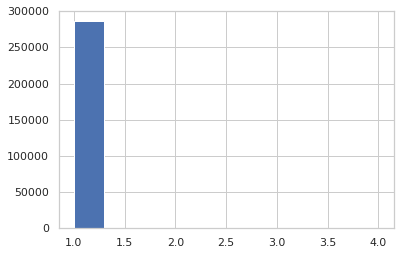

In [156]:
CPS_2['o_srcearn'].hist()

In [157]:
CPS_2['o_srcearn'].describe()

count    286180.000000
mean          1.000493
std           0.038443
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: o_srcearn, dtype: float64

In [158]:
CPS_2['o_srcearn'] = CPS_2['o_srcearn'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
CPS_2['o_srcearn'].isnull().sum()

0

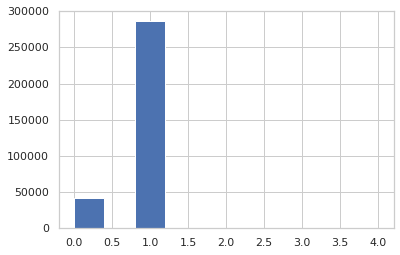

In [160]:
CPS_2['o_srcearn'].hist()

## Quem possui a maior porcentagem de graduação homem e mulheres

In [161]:
IDC_2 = IDC.copy()

IDC_2['degree'].value_counts() # 0=no college degree; 1=bachelor’s without advanced degree; 2=advanced degree

0.0    24504
1.0     6373
2.0     2481
Name: degree, dtype: int64

In [162]:
graphic = IDC_2['degree'].value_counts() # 0=no college degree; 1=bachelor’s without advanced degree; 2=advanced degree

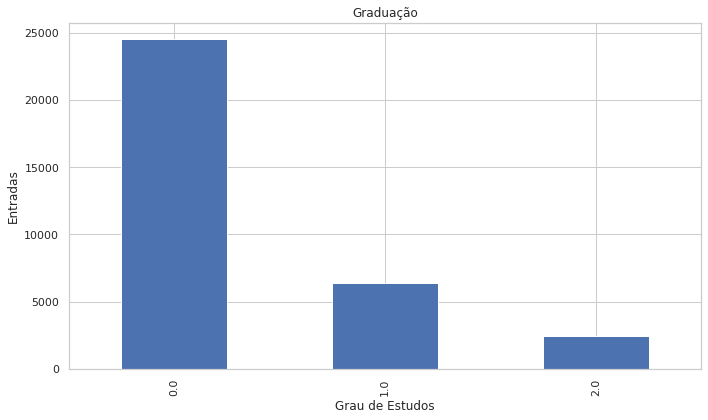

In [163]:
fig, ax = plt.subplots(figsize=(10,6))

# df['Entradas'].plot(kind='bar', ax=ax)  # pode ser feito desta maneira também
graphic.plot( kind="bar", ax=ax)

ax.set_title("Graduação")
ax.set_xlabel("Grau de Estudos")
ax.set_ylabel("Entradas")

plt.tight_layout()

In [164]:
IDC_2.groupby('degree')['sex'].value_counts()

degree  sex
0.0     2      12566
        1      11938
1.0     2       3244
        1       3129
2.0     2       1339
        1       1142
Name: sex, dtype: int64

In [165]:
graphic_2 = IDC_2.groupby('degree')['sex'].value_counts()

In [166]:
graphic_2

degree  sex
0.0     2      12566
        1      11938
1.0     2       3244
        1       3129
2.0     2       1339
        1       1142
Name: sex, dtype: int64

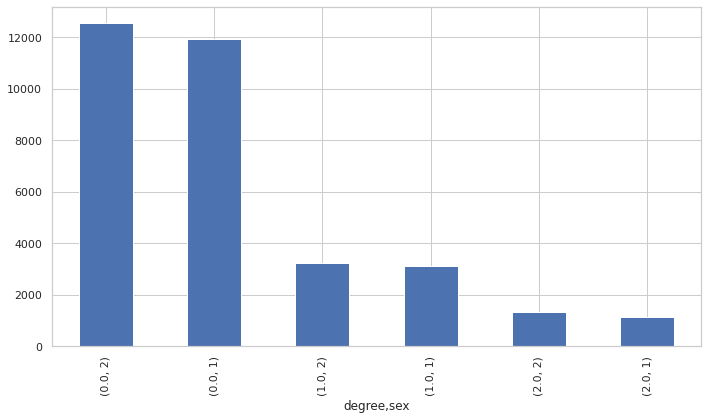

In [167]:
fig, ax13 = plt.subplots(figsize=(10,6))

# df['Entradas'].plot(kind='bar', ax=ax)  # pode ser feito desta maneira também
graphic_2.plot( kind="bar", ax=ax13)

ax.set_title("Entrada Média de Passageiros - Linha 1 (Dezembro/2018)")
ax.set_xlabel("Estação")
ax.set_ylabel("Entradas")

sns.set_theme()
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

plt.tight_layout()

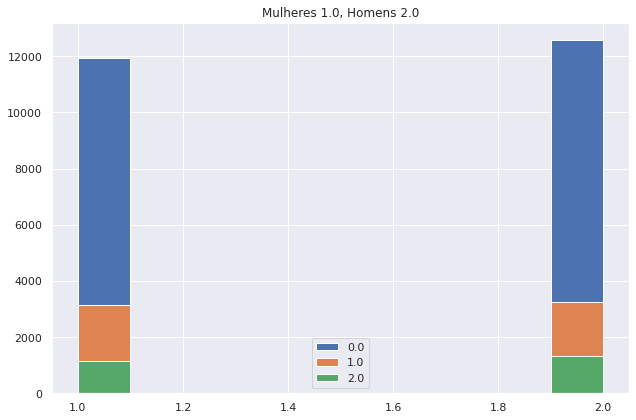

In [168]:
fig, (ax3) = plt.subplots()
IDC_2.groupby('degree')['sex'].hist(ax=ax3, figsize=(9,6), legend=True)
ax3.set_title('Mulheres 1.0, Homens 2.0')
plt.tight_layout();

## Idade e sexo

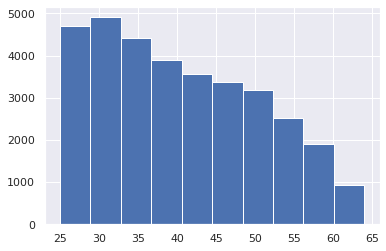

In [169]:
IDC['age'].hist();

In [170]:
IDC['age'].describe()

count    33398.000000
mean        40.467872
std         10.401476
min         25.000000
25%         31.000000
50%         39.000000
75%         49.000000
max         64.000000
Name: age, dtype: float64

In [171]:
CPS_2.groupby(['sex']).age.mean().sort_values(ascending=False) 

sex
2    41.819473
1    41.269728
Name: age, dtype: float64

In [172]:
CPS_2['incwage'].describe() # incwage_lbl Wage and salary income

count    328559.000000
mean      33210.939941
std       22380.114632
min          15.000000
25%       16000.000000
50%       28500.000000
75%       45000.000000
max      100000.000000
Name: incwage, dtype: float64

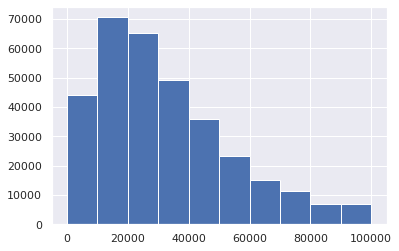

In [173]:
CPS_2['incwage'].hist();

In [174]:
CPS_3 = CPS_2.copy()
CPS_3 = CPS_3.query('incwage < 70000')

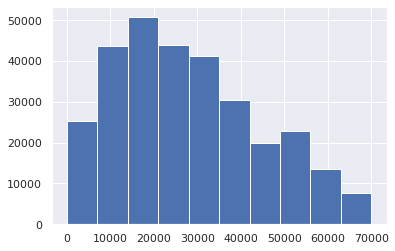

In [175]:
CPS_3['incwage'].hist();

In [176]:
CPS_3['incwage'].describe()

count    299267.000000
mean      28365.503504
std       16631.156788
min          15.000000
25%       15000.000000
50%       25975.000000
75%       40000.000000
max       69999.000000
Name: incwage, dtype: float64

In [177]:
CPS_3.groupby(['sex']).incwage.mean().sort_values(ascending=False) 

sex
1    31865.540538
2    25124.223720
Name: incwage, dtype: float64